In [29]:
import pandas as pd
import numpy as np

from dython import nominal
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [2]:
df = pd.read_csv('../../data/tweets_one_hot.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4807 entries, 0 to 4806
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     4807 non-null   object
 1   line     4807 non-null   object
 2   tweet    4807 non-null   object
 3   stop     4807 non-null   int64 
 4   restart  4807 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 187.9+ KB
None


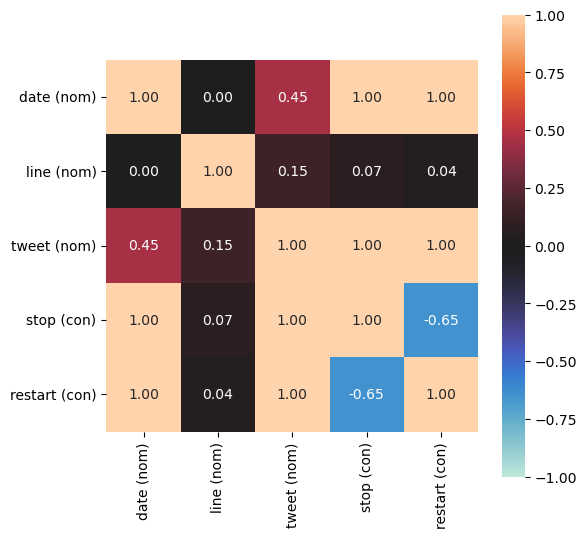

{'corr':                date (nom)  line (nom)  tweet (nom)  stop (con)  restart (con)
 date (nom)       1.000000    0.000000     0.454786    0.999571       1.000000
 line (nom)       0.000000    1.000000     0.149119    0.071620       0.041988
 tweet (nom)      0.454786    0.149119     1.000000    1.000000       1.000000
 stop (con)       0.999571    0.071620     1.000000    1.000000      -0.646948
 restart (con)    1.000000    0.041988     1.000000   -0.646948       1.000000,
 'ax': <Axes: >}

In [3]:
#CORRELATION COEFFICIENTS
nominal.associations(df, figsize=(6,6),mark_columns=True)

In [6]:
print(df.stop.value_counts())
print(df.restart.value_counts())

stop
1    2816
0    1991
Name: count, dtype: int64
restart
0    3678
1    1129
Name: count, dtype: int64


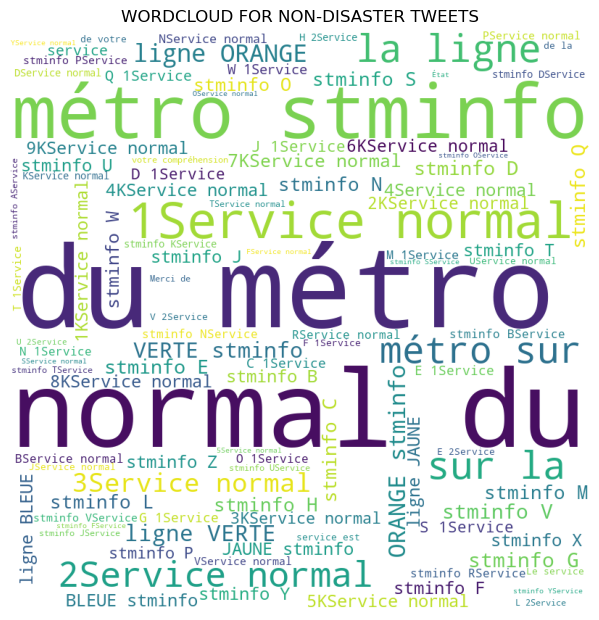

In [15]:
#WORDCLOUD FOR NON-DISASTER TWEETS
all_txt = ' '

for tweet in df["tweet"][df["restart"]==1]:
    all_txt += tweet

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(all_txt)
  
# plot the WordCloud image                       
plt.figure(figsize = (6,6), facecolor = None)
plt.title("WORDCLOUD FOR NON-DISASTER TWEETS")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [31]:
string = "Aujourd’hui, le métro de Montréal célèbre ses 50 ans! Joignez-vous à nous en cette journée spéciale de célébrations!  http://ow.ly/QDXE305b24y http://"

string.split()
# sw = set(stopwords.words('english'))

['Aujourd’hui,',
 'le',
 'métro',
 'de',
 'Montréal',
 'célèbre',
 'ses',
 '50',
 'ans!',
 'Joignez-vous',
 'à',
 'nous',
 'en',
 'cette',
 'journée',
 'spéciale',
 'de',
 'célébrations!',
 'http://ow.ly/QDXE305b24y',
 'http://']

In [59]:
from nltk.corpus import stopwords
sw = stopwords.words('english')
swe = set(stopwords.words('english'))
swf = set(stopwords.words('french'))
swe = swe.difference(swf)


def sw_in(tweet):
    for word in tweet.split():
        if len(word) < 2:
            continue
            
        if word in swe:
            return True
        
    return False

df[df.tweet.apply(sw_in)]
print(df.loc[4429].tweet)

La bonne réponse est la station  Beaudry.

Cette station n’a techniquement pas d’escaliers mécaniques, mais bien un tapis roulant! Avec la station  Charlevoix à une profondeur de 29 mètres, la station  Beaudry est la plus profonde de notre réseau!  [Journée mondiale de la statistique]   Parmi le large parc d’escaliers mécaniques sur notre réseau, une station sur la  Ligne 1 - Verte offre une alternative aux escaliers mécaniques. Saurez-vous l’identifier? Show this poll 3 1 8 15K


In [54]:
# dir(swe)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 'same',
 'shan',
 "shan't",
 'she',